In [1]:
import warnings
warnings.filterwarnings('ignore')

Many familys consider the relative safety of their family members, neighbors and visitors when deciding to get a pet dog. It is also in the owner's interest to know the risk factors associated with living in neighborhoods where there are other domestic animals particularly with exposure to rabies.

In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

animalbites_df = pd.read_csv('Health_AnimalBites.csv')

In [4]:
animalbites_df.shape

(9003, 15)

In [5]:
animalbites_df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [6]:
animalbites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


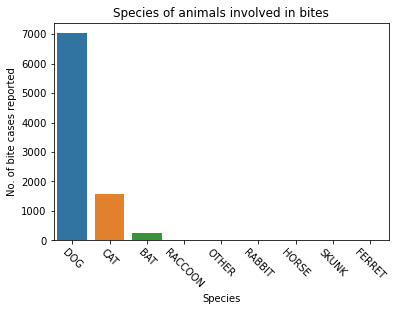

In [7]:
sns.countplot(x="SpeciesIDDesc", data= animalbites_df);
plt.title('Species of animals involved in bites')
plt.xlabel('Species')
plt.ylabel('No. of bite cases reported')
plt.xticks(rotation=-45)

plt.show()

In [8]:
animalbites_df['SpeciesIDDesc'].unique()

array(['DOG', 'CAT', 'BAT', 'RACCOON', 'OTHER', 'RABBIT', nan, 'HORSE',
       'SKUNK', 'FERRET'], dtype=object)

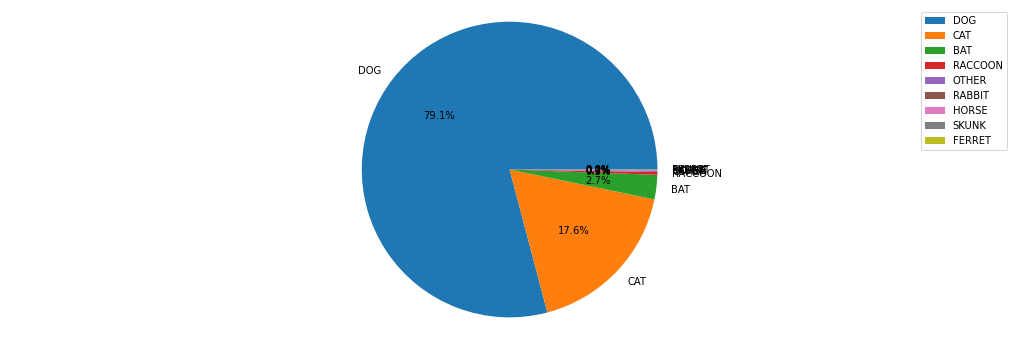

In [9]:
y = np.array(animalbites_df['SpeciesIDDesc'].value_counts())
mylabels = ['DOG', 'CAT', 'BAT', 'RACCOON', 'OTHER', 'RABBIT', 'HORSE',
       'SKUNK', 'FERRET']
plt.figure(figsize=(18,6))
plt.pie(y, labels = mylabels,autopct='%1.1f%%')
plt.axis('equal')
plt.legend()
plt.show() 

It appears that the two animals involved in most biting incidents are cat and dogs. This perhaps because they are the most domesticated animals and therefore have more interactions with humans.

79% of bites are from dogs. Which dog breeds are most involved in bites?


Is there any difference in unmber of dog bites per year?

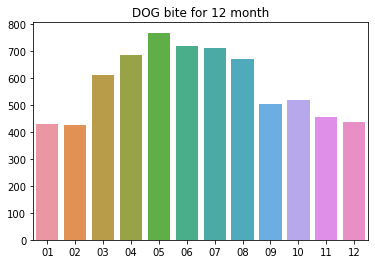

In [26]:
animal_month('DOG',animalbites_df)

There appears to be a slight increase in dog bites during Spring and Summer. This might be because as the weather warms up, people tend to go out with their dogs more.

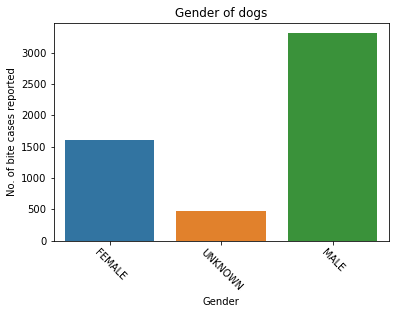

In [13]:
dog_breeds = animalbites_df[animalbites_df['SpeciesIDDesc'] == "DOG"]
sns.countplot(x="GenderIDDesc", data= dog_breeds);
plt.title('Gender of dogs')
plt.xlabel('Gender')
plt.ylabel('No. of bite cases reported')
plt.xticks(rotation=-45)

plt.show()

It appears the male dogs are more aggressive that female dogs.

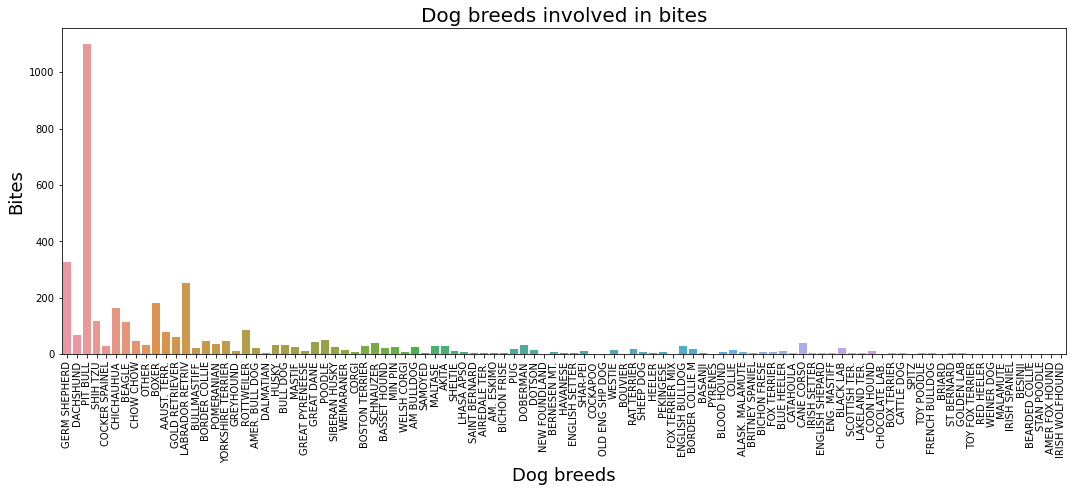

In [10]:
dog_breeds = animalbites_df[animalbites_df['SpeciesIDDesc'] == "DOG"]

plt.figure(figsize=(18,6))
sns.countplot(dog_breeds['BreedIDDesc'])
plt.title("Dog breeds involved in bites", fontsize=20)
plt.xlabel('Dog breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.show()

In [30]:
dog_breeds['BreedIDDesc'].value_counts()

PIT BULL           1101
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
CHICHAUHUA          165
                   ... 
RED HEELER            1
BRIARD                1
CHOCOLATE LAB.        1
OLD ENG SHP DOG       1
IRISH WOLFHOUND       1
Name: BreedIDDesc, Length: 101, dtype: int64

Pit bulls are involved in most of the reported bites. they appear to be the most aggressive breeds. There are some dogs that show as few as 1 bite per year and there may also be some other beeds that do not have any recorded bites. These would be the least aggressive dogs.

How many of these dogs test positive for rabies?

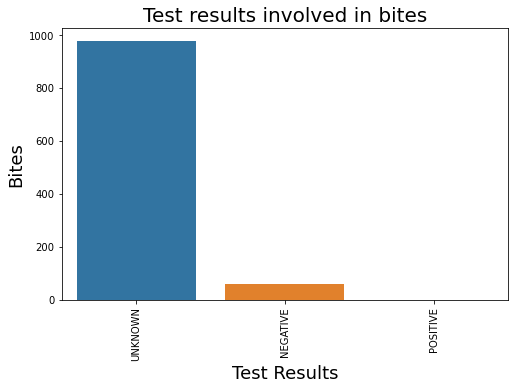

In [35]:
dog_breeds = animalbites_df[animalbites_df['SpeciesIDDesc'] == "DOG"]
plt.figure(figsize=(8,5))
sns.countplot(dog_breeds['ResultsIDDesc'])
plt.title("Test results involved in bites", fontsize=20)
plt.xlabel('Test Results', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.show()

In [33]:
dog_breeds['ResultsIDDesc'].value_counts()

UNKNOWN     979
NEGATIVE     58
POSITIVE      1
Name: ResultsIDDesc, dtype: int64

Only one dog was reported to have rabies of the animals that were  tested. The status of the majority of the dogs is unknown.

### Conclusion

In conclusion it is safe to be around most dogs since there appears to be less threat of diseas. However, it would be prudent to avoid species that are more aggressive such as pitbulls when considering to get a pet or moving to a new neighborhood.